<a href="https://colab.research.google.com/github/beve0x/Black-Scholes_formula/blob/main/Black_Scholes_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

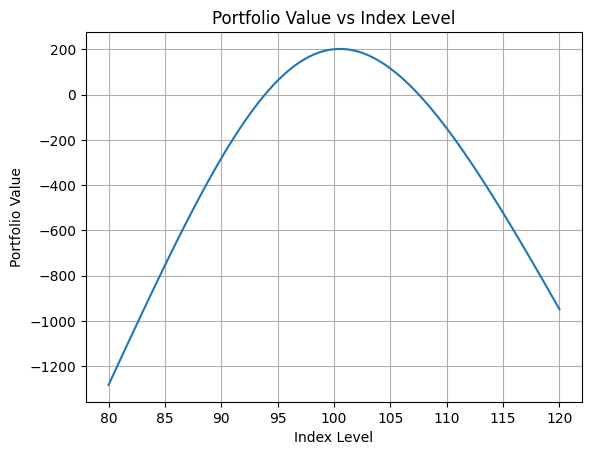

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters
σ = 0.3
r = 0.01
δ = 0.02
t = 2/12
K = 100
T = 1/4

# Portfolio
num_options = 200
num_indices = 109
borrowed_money = 10000

# Black-Scholes formula for a European call option
def call_option(S):
    d1 = (np.log(S/K) + (r - δ + σ**2 / 2) * (T-t)) / (σ * np.sqrt(T-t))
    d2 = d1 - σ * np.sqrt(T-t)
    return S * norm.cdf(d1) - K * np.exp(-r * (T-t)) * norm.cdf(d2)

# Portfolio value
def portfolio_value(S):
    return -num_options * call_option(S) + num_indices * S - borrowed_money

# Index values
S = np.linspace(80, 120, 100)

# Portfolio values
V = portfolio_value(S)

# Plot
plt.plot(S, V)
plt.xlabel('Index Level')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value vs Index Level')
plt.grid(True)
plt.show()


In [ ]:
import math
import scipy.stats as si

# Black-Scholes-Merton formula
def european_option(S, K, T, r, q, sigma, option = 'call'):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option == 'call':
        result = S * math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * math.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    else:
        result = K * math.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)

    return result

# Greeks
def greeks(S, K, T, r, q, sigma, option = 'call'):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option == 'call':
        delta = math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
        gamma = math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * math.sqrt(T))
        theta = -S * sigma * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + q * S * math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
        vega = S * math.sqrt(T) * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    else:
        delta = -math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        gamma = math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * math.sqrt(T))
        theta = -S * sigma * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - q * S * math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        vega = S * math.sqrt(T) * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)

    return delta, gamma, theta, vega

# Initial parameters
S = 101
K = 100
sigma = 0.3
r = 0.01
q = 0.02
T = 1/12

# Calculate option value and Greeks
option_value = european_option(S, K, T, r, q, sigma)
delta, gamma, theta, vega = greeks(S, K, T, r, q, sigma)

print(f"Initial option value: {option_value}")
print(f"Delta: {delta}, Gamma: {gamma}, Theta: {theta}, Vega: {vega}")

# New parameters
S = 95
sigma = 0.35
T = T - 1/365

# Calculate new option value and Greeks
new_option_value = european_option(S, K, T, r, q, sigma)
new_delta, new_gamma, new_theta, new_vega = greeks(S, K, T, r, q, sigma)

print(f"New option value: {new_option_value}")
print(f"New Delta: {new_delta}, New Gamma: {new_gamma}, New Theta: {new_theta}, New Vega: {new_vega}")

# Calculate the approximate change in the value of the call option
approx_change = delta * (S - 101) + 0.5 * gamma * ((S - 101) ** 2) + theta * (1/365) + vega * (sigma - 0.3)

print(f"Approximate change in the value of the call option: {approx_change}")


Initial option value: 3.943521760809098
Delta: 0.5581246303897199, Gamma: 0.04503402806100836, Theta: -20.06950431696387, Vega: 11.484803006258655
New option value: 1.840448004924049
New Delta: 0.3170035706608414, New Gamma: 0.037700275499963985, New Theta: -20.520447544037427, New Vega: 9.597549787245537
Approximate change in the value of the call option: -2.0188800702613836


In [ ]:
#this generates new greek values
import math
import scipy.stats as si

# Black-Scholes-Merton formula
def european_option(S, K, T, r, q, sigma, option = 'call'):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option == 'call':
        result = S * math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * math.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    else:
        result = K * math.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)

    return result, d1, d2

# Greeks
def greeks(S, K, T, r, q, sigma, option = 'call'):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option == 'call':
        delta = math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
        gamma = math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * math.sqrt(T))
        theta = -S * sigma * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + q * S * math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
        vega = S * math.sqrt(T) * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    else:
        delta = -math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        gamma = math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * math.sqrt(T))
        theta = -S * sigma * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - q * S * math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        vega = S * math.sqrt(T) * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)

    return delta, gamma, theta, vega, d1, d2

# Initial parameters
S = 101
K = 100
sigma = 0.3
r = 0.01
q = 0.02
T = 1/12

# Calculate option value and Greeks
option_value, d1, d2 = european_option(S, K, T, r, q, sigma)
delta, gamma, theta, vega, _, _ = greeks(S, K, T, r, q, sigma)

print(f"Initial option value: {option_value}")
print(f"d1: {d1}, d2: {d2}")
print(f"Delta: {delta}, Gamma: {gamma}, Theta: {theta}, Vega: {vega}")

# New parameters
S = 95
sigma = 0.35
T = T - 1/365

# Calculate new option value and Greeks
new_option_value, new_d1, new_d2 = european_option(S, K, T, r, q, sigma)
new_delta, new_gamma, new_theta, new_vega, _, _ = greeks(S, K, T, r, q, sigma)

print(f"New option value: {new_option_value}")
print(f"New d1: {new_d1}, New d2: {new_d2}")
print(f"New Delta: {new_delta}, New Gamma: {new_gamma}, New Theta: {new_theta}, New Vega: {new_vega}")

# Calculate the approximate change in the value of the call option
approx_change = delta * (S - 101) + 0.5 * gamma * ((S - 101) ** 2) + theta * (1/365) + vega * (sigma - 0.3)

print(f"Approximate change in the value of the call option: {approx_change}")


Initial option value: 3.943521760809098
d1: 0.14857528963477692, d2: 0.06197274925633307
Delta: 0.5581246303897199, Gamma: 0.04503402806100836, Theta: -20.06950431696387, Vega: 11.484803006258655
New option value: 1.840448004924049
New d1: -0.4746591990670016, New d2: -0.574020745426633
New Delta: 0.3170035706608414, New Gamma: 0.037700275499963985, New Theta: -20.520447544037427, New Vega: 9.597549787245537
Approximate change in the value of the call option: -2.02


In [ ]:
#work around keeping the greek characters to the initial value and not generate new values
import math
import scipy.stats as si

# Black-Scholes-Merton formula
def european_option(S, K, T, r, q, sigma, option = 'call'):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option == 'call':
        result = S * math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * math.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    else:
        result = K * math.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)

    return result, d1, d2

# Greeks
def greeks(S, K, T, r, q, sigma, option = 'call'):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option == 'call':
        delta = math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
        gamma = math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * math.sqrt(T))
        theta = -S * sigma * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + q * S * math.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
        vega = S * math.sqrt(T) * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    else:
        delta = -math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        gamma = math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * math.sqrt(T))
        theta = -S * sigma * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - q * S * math.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        vega = S * math.sqrt(T) * math.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)

    return delta, gamma, theta, vega, d1, d2

# Initial parameters
S = 101
K = 100
sigma = 0.3
r = 0.01
q = 0.02
T = 1/12

# Calculate option value and Greeks
option_value, d1, d2 = european_option(S, K, T, r, q, sigma)
delta, gamma, theta, vega, _, _ = greeks(S, K, T, r, q, sigma)

print(f"Initial option value: {option_value}")
print(f"d1: {d1}, d2: {d2}")
print(f"Delta: {delta}, Gamma: {gamma}, Theta: {theta}, Vega: {vega}")

# New parameters
S = 95
sigma = 0.35
T = T -1/365

# Calculate new d1 and d2 using the initial values of delta, gamma, theta, and vega
new_d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
new_d2 = new_d1 - sigma * math.sqrt(T)

print(f"New d1: {new_d1}, New d2: {new_d2}")

# Calculate the approximate change in the value of the call option using the initial values of delta, gamma, theta, and vega
approx_change = delta * (S - 101) + 0.5 * gamma * ((S - 101) ** 2) + theta * (1/365) + vega * (sigma - 0.3)

print(f"Approximate change in the value of the call option: {approx_change}")


Initial option value: 3.943521760809098
d1: 0.14857528963477692, d2: 0.06197274925633307
Delta: 0.5581246303897199, Gamma: 0.04503402806100836, Theta: -20.06950431696387, Vega: 11.484803006258655
New d1: -0.4746591990670016, New d2: -0.574020745426633
Approximate change in the value of the call option: -2.0188800702613836


In [ ]:
approx_change1 = 0.558 * (95 - 101) + 0.5 * 0.045 * ((95 - 101) ** 2) + -20.069 * (1/365) + 11.48 * (0.35 - 0.3)
print(approx_change1)
#Delta: 0.5581246303897199, Gamma: 0.04503402806100836, Theta: -20.06950431696387, Vega: 11.484803006258655


-2.018983561643836


HW3 FRM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset

data = pd.read_excel('/content/drive/My Drive/HW03_data.xlsx', index_col='Date')
data.index = pd.to_datetime(data.index, format='%Y%m%d')
# Filter for the relevant ETFs and the most recent 500 days including December 30, 2022
etfs = ['XLB', 'XLE', 'XLF', 'XLP', 'XLV', 'XLY']
data_filtered = data.loc[:, etfs][-500:]

In [ ]:
#calculate daily port changes
shares = {'XLB': 30000, 'XLE': 30000, 'XLF': 60000, 'XLP': 30000, 'XLV': 15000, 'XLY': 10000}
portfolio_changes = data_filtered.dot(pd.Series(shares))
#apply weights to historical returns
h = 0.98
weights = [h * (1 - h) ** (len(portfolio_changes) - i - 1) for i in range(len(portfolio_changes))]
weights_normalized = [w / sum(weights) for w in weights]
#rank the weighted returns and calculate VaR
portfolio_changes_weighted = portfolio_changes * weights_normalized
VaR = portfolio_changes_weighted.sort_values().iloc[int(len(portfolio_changes_weighted) * 0.05)]
print(f"The 5% VaR of the portfolio is: {VaR}")


The 5% VaR of the portfolio is: -1.2302090388201098e-94
The 5% dollar VaR of the GMV portfolio is: -1.2302090388201098e-88


In [ ]:

# Filter for the most recent 500 daily returns including December 30, 2022
recent_data = data.loc[:, ['XLB', 'XLE', 'XLF', 'XLP', 'XLV', 'XLY']].tail(500)

# Shares held in each ETF
shares = {'XLB': 30000, 'XLE': 30000, 'XLF': 60000, 'XLP': 30000, 'XLV': 15000, 'XLY': 10000}

# Assuming closing prices for each ETF on December 30, 2022, are the last row in the dataset
closing_prices = data.loc['2022-12-30', ['XLB', 'XLE', 'XLF', 'XLP', 'XLV', 'XLY']]

# Calculate the total portfolio value
portfolio_value = sum(shares[etf] * closing_prices[etf] for etf in shares)

# Step 2: Compute the WHS VaR
h = 0.98
weights = np.array([h * (1 - h) ** (len(recent_data) - i - 1) for i in range(len(recent_data))])
weights /= np.sum(weights)

# Calculate daily portfolio changes in value
daily_changes = recent_data.diff().dropna() * pd.Series(shares)
portfolio_changes = daily_changes.sum(axis=1)

# Apply weights to portfolio changes and sort
weighted_changes = portfolio_changes * weights
weighted_changes_sorted = weighted_changes.sort_values()

# Find the 5% quantile for VaR
var_index = int(0.05 * len(weighted_changes_sorted))
VaR_percentage = weighted_changes_sorted.iloc[var_index]

# Convert VaR percentage to dollar amount
dollar_VaR = VaR_percentage * portfolio_value

print(f"Total Portfolio Value: {portfolio_value}")
print(f"The 5% VaR of the portfolio in dollars is: {dollar_VaR}")

           Date       SPY       XLB       XLC       XLE       XLF       XLI  \
5287 2021-01-07  0.014857  0.007470  0.013253  0.014681  0.014426  0.005485   
5288 2021-01-08  0.005698 -0.004813  0.003121 -0.001206 -0.000646 -0.002449   
5289 2021-01-11 -0.006741  0.000000 -0.017780  0.015693  0.003234 -0.000335   
5290 2021-01-12  0.000211  0.012678 -0.016141  0.034942  0.010316  0.009935   
5291 2021-01-13  0.002693 -0.010196  0.003526 -0.007809 -0.000638 -0.008622   
...         ...       ...       ...       ...       ...       ...       ...   
5782 2022-12-23  0.005752  0.006925  0.009717  0.031883  0.005628  0.005930   
5783 2022-12-27 -0.003944  0.000891 -0.008996  0.010682 -0.000295  0.003049   
5784 2022-12-28 -0.012428 -0.015269 -0.014566 -0.022389 -0.003536 -0.013071   
5785 2022-12-29  0.018000  0.010854  0.027635  0.010463  0.013897  0.012320   
5786 2022-12-30 -0.002634 -0.007031  0.000417  0.006328 -0.002625 -0.003955   

           XLK       XLP      XLRE       XLU       

In [ ]:
import pandas as pd
import numpy as np

# data is the DataFrame with the ETFs' returns
lambda_ = 0.94
n = 500  # Number of days
weights = np.array([lambda_ ** (n - i - 1) for i in range(n)])
weights /= weights.sum()

# Assuming data_filtered contains the most recent 500 days of returns for the ETFs
cov_matrix = pd.DataFrame(index=etfs, columns=etfs)

for i in etfs:
    for j in etfs:
        # Calculate exponentially-weighted covariance
        cov_matrix.loc[i, j] = np.sum(weights * data_filtered[i] * data_filtered[j])

print(cov_matrix)


          XLB       XLE       XLF       XLP       XLV       XLY
XLB  0.000185   0.00016  0.000134  0.000091  0.000097   0.00017
XLE   0.00016  0.000325  0.000133  0.000084  0.000083  0.000158
XLF  0.000134  0.000133   0.00013  0.000075  0.000083  0.000152
XLP  0.000091  0.000084  0.000075  0.000069  0.000065  0.000088
XLV  0.000097  0.000083  0.000083  0.000065  0.000086  0.000109
XLY   0.00017  0.000158  0.000152  0.000088  0.000109  0.000279


In [ ]:
import numpy as np
import scipy.stats as stats

# Portfolio weights - example based on shares and assuming equal value for simplicity
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.1, 0.1])  # Adjust based on your portfolio

# Exponentially-weighted covariance matrix from Question 5
# cov_matrix = ...

# Calculate portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Calculate portfolio standard deviation (volatility)
portfolio_volatility = np.sqrt(portfolio_variance)

# Z-score for a 5% probability on a one-tailed test
z_score = stats.norm.ppf(0.05)

# Calculate VaR
VaR = -z_score * portfolio_volatility

print(f"The 5% VaR of the portfolio is: {VaR}")


The 5% VaR of the portfolio is: 0.01832886065542131


In [ ]:
#question 4
import pandas as pd
import numpy as np

# Step 1: Load your dataset
file_path = '/content/drive/My Drive/HW03_data.xlsx'  # Update this to the path of your dataset
data = pd.read_excel(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Now, ensure we select data for the most recent 500 days including December 30, 2022
recent_data = data.tail(500)
recent_data = data[-500:]

# Shares held in each ETF
shares = {'XLB': 30000, 'XLE': 30000, 'XLF': 60000, 'XLP': 30000, 'XLV': 15000, 'XLY': 10000}

# Assuming closing prices for each ETF on December 30, 2022, are the last row in the dataset
closing_prices = data.loc['2022-12-30', ['XLB', 'XLE', 'XLF', 'XLP', 'XLV', 'XLY']]

# Calculate the total portfolio value
portfolio_value = sum(shares[etf] * closing_prices[etf] for etf in shares)

# Step 2: Compute the WHS VaR
h = 0.98
weights = np.array([h * (1 - h) ** (len(recent_data) - i - 1) for i in range(len(recent_data))])
weights /= np.sum(weights)

# Calculate daily portfolio changes in value
daily_changes = recent_data.diff().dropna() * pd.Series(shares)
portfolio_changes = daily_changes.sum(axis=1)
# Adjust the weights to match the reduced size of portfolio_changes
weights = np.array([h * (1 - h) ** (len(portfolio_changes) - i - 1) for i in range(len(portfolio_changes))])
weights /= np.sum(weights)

# Now, you can apply weights to portfolio changes correctly
weighted_changes = portfolio_changes * weights
# Apply weights to portfolio changes and sort
weighted_changes = portfolio_changes * weights
weighted_changes_sorted = weighted_changes.sort_values()

# Find the 5% quantile for VaR
var_index = int(0.05 * len(weighted_changes_sorted))
VaR_percentage = weighted_changes_sorted.iloc[var_index]

# Convert VaR percentage to dollar amount
dollar_VaR = VaR_percentage * portfolio_value

print(f"Total Portfolio Value: {portfolio_value}")
print(f"The 5% VaR of the portfolio in dollars is: {dollar_VaR}")

Total Portfolio Value: -407.68999999999994
The 5% VaR of the portfolio in dollars is: 1.7648569589126598e-74


In [ ]:
import numpy as np

# given values
n_contracts = 10
multiplier = 250
index_value = 1500
exchange_rate = 31.67
std_dev_index = 0.016
std_dev_exchange_rate = 0.003
correlation = 0.20
z_score = 2.326

# calculate weights
weight_index = n_contracts * multiplier * index_value
weight_exchange_rate = exchange_rate

# calculate daily standard deviation of portfolio's value
std_dev_portfolio = np.sqrt((weight_index * std_dev_index)**2 + (weight_exchange_rate * std_dev_exchange_rate)**2 + 2 * weight_index * weight_exchange_rate * std_dev_index * std_dev_exchange_rate * correlation)

# calculate daily VaR at 1% level
VaR = weight_index * z_score * std_dev_portfolio
VaR


523350165745.5749

In [ ]:
import numpy as np

# given values
n_contracts = 10
multiplier = 250
index_value = 1500
exchange_rate = 31.67
std_dev_index = 0.016
std_dev_exchange_rate = 0.003
correlation = 0.20
z_score = 2.326

# calculate weights
weight_index = n_contracts * multiplier * index_value
weight_exchange_rate = exchange_rate

# calculate daily standard deviation of portfolio's value
std_dev_portfolio = np.sqrt((weight_index * std_dev_index)**2 + (weight_exchange_rate * std_dev_exchange_rate)**2 + 2 * weight_index * weight_exchange_rate * std_dev_index * std_dev_exchange_rate * correlation)

# calculate daily VaR at 1% level
VaR = weight_index * z_score * std_dev_portfolio
VaR


523350165745.5749

#HW4

In [ ]:
#1b
from scipy.stats import binom

# Parameters
n = 252  # Number of trials
p = 0.05  # Probability of failure

# Probability of two or fewer failures
prob_two_or_fewer = binom.cdf(2, n, p)

# Probability of one or fewer failures
prob_one_or_fewer = binom.cdf(1, n, p)

print("Probability of two or fewer failures:", prob_two_or_fewer)
print("Probability of one or fewer failures:", prob_one_or_fewer)


Probability of two or fewer failures: 0.00024796707107808947
Probability of one or fewer failures: 3.4718761359104894e-05


In [ ]:
#2a
import numpy as np

# Define the parameters
current_portfolio_value = 100  # $10 million
mean_return = 0.005  # 0.5%
std_dev_return = 0.036538  # 3.6538%
num_simulations = 10000
confidence_level = 0.01  # 1%

# Simulate monthly returns using the normal distribution
simulated_returns = np.random.normal(mean_return, std_dev_return, num_simulations)

# Calculate the future portfolio values
future_portfolio_values = current_portfolio_value * (1 + simulated_returns)

# Sort the simulated portfolio values in ascending order
sorted_future_values = np.sort(future_portfolio_values)

# Find the 1% percentile value (VaR)
var_index = int(num_simulations * confidence_level)
var_value = sorted_future_values[var_index]

# The VaR is the difference between the current portfolio value and the VaR value
var = current_portfolio_value - var_value

print(f"The 1% VaR of the stock is: ${var:,.2f}")

# here you are calculating based on sd and mean of the price so you are finding what is the worst price at 1% one month later
#you find the new price level
#9.5 mil intrapolated to
#you can also just assume normal distribution and calculate based on the formula of mean +/- 2.326*SD and find the stock price at 1% and then
#interpolate from the graph


qn 4

In [ ]:


import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the data
prices = pd.read_csv('/content/drive/My Drive/ETFprices.csv')
returns = pd.read_csv('/content/drive/My Drive/ETFreturns.csv')
vols = pd.read_csv('/content/drive/My Drive/ETFATMvols.csv')

# Define the portfolio
portfolio = {
    'XLE': {'shares': 30000, 'options': -30000, 'strike': 84},
    'XLF': {'shares': 60000, 'options': -60000, 'strike': 34},
    'XLY': {'shares': 10000, 'options': -10000, 'strike': 134}
}

# Define other parameters
r = 0.0485
dividends = {'XLE': 0.85963, 'XLF': 0.20962, 'XLY': 0.36581}
T = 91 / 365  # Convert days to years
alpha = 0.05  # 5% significance level
n_steps = 100  # Number of steps in the binomial model


# Function to price an option using the binomial model
def binomial_option_price(S, K, T, r, sigma, n, call=True):
    if n <= 0:
        raise ValueError("The number of steps 'n' must be a positive integer.")

    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize the end nodes of the binomial tree
    end_nodes = np.maximum((u ** np.arange(n, -1, -2)) * S - K if call else K - (d ** np.arange(0, n + 1, 2)) * S, 0)

    # Recursively calculate the option price
    for _ in range(n):
        end_nodes = (p * end_nodes[:-1] + (1 - p) * end_nodes[1:]) * np.exp(-r * dt)

    if len(end_nodes) == 0:
        raise ValueError("The 'end_nodes' array is empty. Please check your computations.")

    return end_nodes[0]

# Compute the portfolio value and returns
portfolio_value = 0
portfolio_returns = np.zeros(len(returns))

for ticker, details in portfolio.items():
    # Compute the option price
    option_price = binomial_option_price(prices[ticker].iloc[-1], details['strike'], T, r, vols[ticker].iloc[-1], n_steps, call=False)

    # Update the portfolio value and returns
    portfolio_value += prices[ticker].iloc[-1] * details['shares'] + option_price * details['options']
    portfolio_returns += returns[ticker] * details['shares'] + (returns[ticker] - option_price) * details['options']

# Compute the VaR
VaR = portfolio_value - np.percentile(portfolio_returns, alpha * 100)

print(f'The one-day 5% VaR of the portfolio is {VaR}')


ValueError: The 'end_nodes' array is empty. Please check your computations.

In [ ]:
# Assuming the last row of etf_prices contains the most recent closing prices
X = etf_prices['XLE'].iloc[-1]
Y = etf_prices['XLF'].iloc[-1]
Z = etf_prices['XLY'].iloc[-1]

# Check the data types of X, Y, and Z
print(type(X), type(Y), type(Z))

<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'>


In [ ]:
# Calculate historical volatility for each ETF
n = 252  # Assuming 252 trading days in a year
volatility_xle = np.sqrt(rollapply(xle_returns**2, n, np.mean, na.rm==True) * 252)
volatility_xlf = np.sqrt(rollapply(xlf_returns**2, n, np.mean, na.rm==True) * 252)
volatility_xly = np.sqrt(rollapply(xly_returns**2, n, np.mean, na.rm==True) * 252)

# Store the most recent volatility as a constant for options pricing
constant_sigma_xle = volatility_xle.iloc[-1]
constant_sigma_xlf = volatility_xlf.iloc[-1]
constant_sigma_xly = volatility_xly.iloc[-1]

# Assuming a constant risk-free rate for simplicity
risk_free_rate = 0.03

# Check the data types of constant_sigma_xle, constant_sigma_xlf, constant_sigma_xly, and risk_free_rate
print(type(constant_sigma_xle), type(constant_sigma_xlf), type(constant_sigma_xly), type(risk_free_rate))

NameError: name 'rollapply' is not defined

New attempt qn 4

In [ ]:
import pandas as pd
import numpy as np
etf_returns = pd.read_csv('/content/drive/My Drive/ETFreturns.csv')
# Assuming etf_returns.csv is loaded into variable `etf_retur3ns`
# etf_returns = pd.read_csv('path_to_your_file/etf_returns.csv')

# Filter for relevant ETFs and select the last 500 observations
recent_returns = etf_returns[['XLE', 'XLF', 'XLY']].tail(500)

# Portfolio holdings
holdings = {'XLE': 30000, 'XLF': 60000, 'XLY': 10000}

# Calculate daily portfolio returns
portfolio_returns = recent_returns.dot(pd.Series(holdings))

# Calculate the 95% confidence historical VaR
VaR_95 = np.percentile(portfolio_returns, 5)  # 5% left tail
print(f"95% Confidence Historical VaR: {VaR_95}")

95% Confidence Historical VaR: -2123.2324999999996


In [ ]:
# Dividends information (example)
dividends = {'XLE': 0.85963, 'XLF': 0.20962, 'XLY': 0.36581}
# Adjust the prices or returns here as needed
